In [179]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as ss
import bisect
import pandas as pd

sns.set_style("darkgrid")

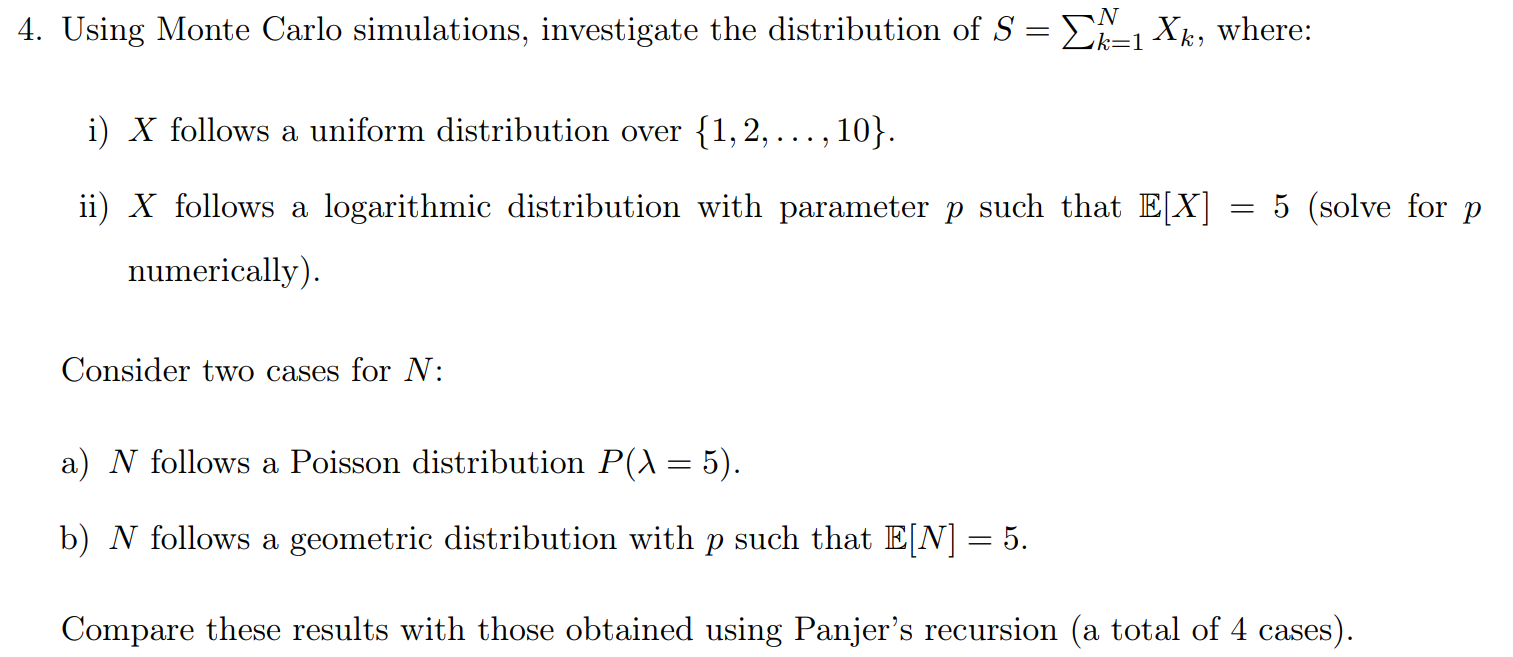

In [161]:
#logarithmic distribution

log_mean = []
p_vec = np.arange(0.01, 1, 0.01)

for p in p_vec:
    log_mean.append(np.mean(ss.logser.rvs(p=p, size=1000000)))

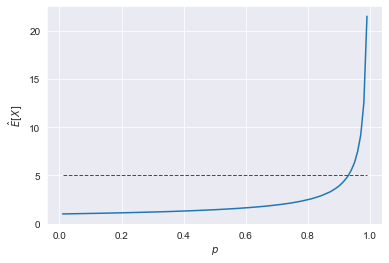

In [169]:
plt.plot(p_vec, log_mean)
plt.plot(p_vec, [5 for _ in p_vec], color="red", ls="--", lw=1)
plt.xlabel("$p$")
plt.ylabel("$\hat{E}[X]$")
plt.savefig("Task4_solv_num_1.svg")

In [163]:
index_left = bisect.bisect_left(log_mean, 5)
log_mean[index_left], log_mean[index_left - 1]

(5.584408, 4.984494)

In [227]:
p_vec[index_left], p_vec[index_left - 1]

(0.9400000000000001, 0.93)

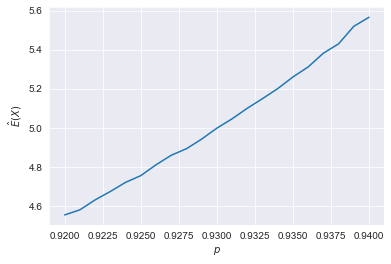

In [150]:
log_mean = []
p_vec = np.arange(0.92, 0.941, 0.001)

for p in p_vec:
    log_mean.append(np.mean(ss.logser.rvs(p=p, size=1000000)))
    
plt.plot(p_vec, log_mean)
plt.xlabel("$p$")
plt.ylabel("$\hat{E}(X)$")
plt.savefig("Task4_solv_num_2.svg")

In [158]:
index_left = bisect.bisect_right(log_mean, 5)
log_mean[index_left], index_left

(5.047087, 11)

In [228]:
p_vec[index_left - 1]

0.93

In [274]:
def S_rv(N_rv, X_rv, size):
    
    if N_rv == "poisson":
        N = ss.poisson.rvs(5, size=size)
        
    elif N_rv == "geometric":
        N = ss.geom.rvs(1/6, size=size) - 1 #adjustment for different formula
        
    else:
        raise ValueError()
    
    N_cs = np.cumsum(N)
    
    if X_rv == "uniform":
        X = (ss.uniform.rvs(size=np.sum(N))*10 + 1)//1
        
    elif X_rv == 'log':
        X = (ss.logser.rvs(p=0.93, size=np.sum(N)))
        
    S = np.zeros(size)
    S[0] = np.sum(X[:N_cs[0]])
    
    for i in np.arange(size - 1):
        S[i + 1] = np.sum(X[N_cs[i]:N_cs[i+1]])
    
    return S

In [275]:
#poisson and uniform

S_pu = S_rv("poisson", "uniform", 100000)

#geometric and uniform

S_gu = S_rv("geometric", "uniform", 100000)

#poisson and log

S_pl = S_rv("poisson", "log", 100000)

#geometric and log

S_gl = S_rv("geometric", "log", 100000)

In [276]:
rvs = {"Poisson-Uniform RVS":S_pu, "Geometric-Uniform RVS":S_gu, "Poisson-Logarithmic RVS":S_pl, "Geometric-Logarithmic RVS":S_gl}

In [277]:
df = pd.DataFrame(rvs)
df_long = pd.melt(df, value_vars=["Poisson-Uniform RVS", "Geometric-Uniform RVS", "Poisson-Logarithmic RVS", "Geometric-Logarithmic RVS"], var_name="Distribution", value_name="rvs")

Text(0, 0.5, '$\\hat{f}(x)$')

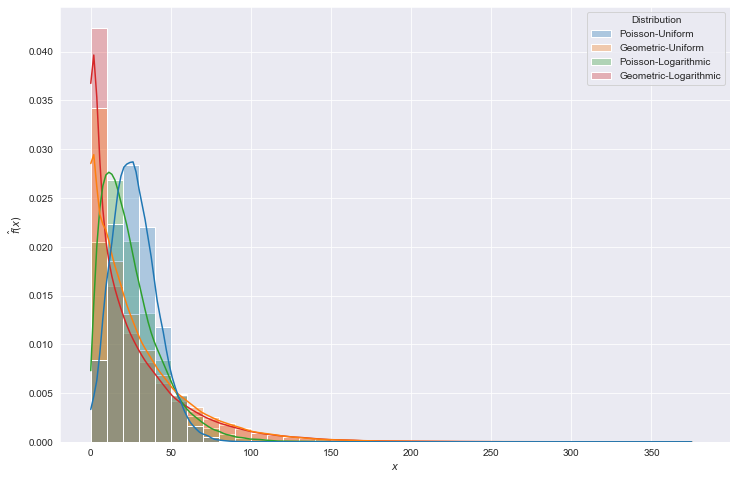

In [278]:
plt.figure(figsize=(12, 8))
order = ["Poisson-Uniform RVS", "Geometric-Uniform RVS", "Poisson-Logarithmic RVS", "Geometric-Logarithmic RVS"]

hist = sns.histplot(df_long, x="rvs", hue="Distribution", hue_order=order, kde=True, stat="density", common_norm=False, binwidth=10, alpha=0.3)

new_labels = ["Poisson-Uniform", "Geometric-Uniform", "Poisson-Logarithmic", "Geometric-Logarithmic"]
for t, l in zip(hist.legend_.texts, new_labels):
    t.set_text(l)
    
hist.set_xlabel("$x$")
hist.set_ylabel("$\hat{f}(x)$")
    
    

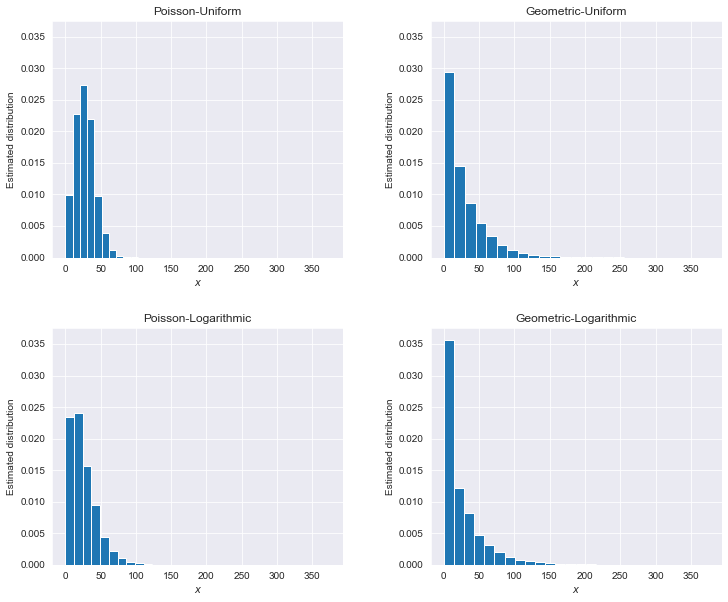

In [413]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

alpha_const = 0.5
bins_dict = {"Poisson-Uniform RVS":10, "Geometric-Uniform RVS":25, "Poisson-Logarithmic RVS":15, "Geometric-Logarithmic RVS":25}
#names_dict = {"Poisson-Uniform RVS":"$\mathcal{P$", "Geometric-Uniform RVS":"", "Poisson-Logarithmic RVS":"", "Geometric-Logarithmic RVS":""}

# Wykresy
histograms = [
    ("Poisson-Uniform RVS", axes[0, 0]),
    ("Geometric-Uniform RVS", axes[0, 1]),
    ("Poisson-Logarithmic RVS", axes[1, 0]),
    ("Geometric-Logarithmic RVS", axes[1, 1]),
]

#tanjers_values = {"Poisson-Uniform RVS":T_pu, "Geometric-Uniform RVS":T_gu, "Poisson-Logarithmic RVS":T_pl, "Geometric-Logarithmic RVS":T_gl}

for x_label, ax in histograms:
    ax.hist(df_long[df_long["Distribution"] == x_label]["rvs"], density=True, label='Estimated PMF', bins=bins_dict[x_label])
    ax.set_title(x_label[:-4]) 
    ax.set_xlabel("$x$")      
    ax.set_ylabel("Estimated distribution")

# Znalezienie wspólnych granic dla osi
x_min = min(ax.get_xlim()[0] for _, ax in histograms)
x_max = max(ax.get_xlim()[1] for _, ax in histograms)

y_min = min(ax.get_ylim()[0] for _, ax in histograms)
y_max = max(ax.get_ylim()[1] for _, ax in histograms)


for _, ax in histograms:
    ax.set_xlim([x_min, x_max])  
    ax.set_ylim([y_min, y_max])  
    
fig.savefig("Task4_distributions_hist.svg")


In [321]:
statistics = df_long.groupby("Distribution")["rvs"].agg(
    mean="mean",
    std="std",
    min="min",
    max="max"
)

# Wyświetlenie wyników
print(statistics.round(2))

                            mean    std  min    max
Distribution                                       
Geometric-Logarithmic RVS  24.88  31.24  0.0  359.0
Geometric-Uniform RVS      27.44  30.85  0.0  375.0
Poisson-Logarithmic RVS    25.09  19.00  0.0  185.0
Poisson-Uniform RVS        27.55  13.97  0.0  103.0


In [370]:
def panjer_formula(fs_vec, distr_X, distr_N, step = 0, last_value=0):
    
    if step == 0:
        if distr_N == "poisson":
            return ss.poisson.pmf(0, 5)
        elif distr_N == "geom":
            return ss.geom.pmf(1, 1/6)
            
    else:
        value = 0
        
        if distr_N == "poisson":
            p_0 = ss.poisson.pmf(0, 5)
            a = 0
            b = 5
            
        elif distr_N == "geom":
            p_0 = ss.geom.pmf(1, 1/6)
            a = 5/6 #1-p
            b = 0
            
        if distr_X == "uniform":
            p_arr = np.concatenate([np.zeros(1), np.array([0.1 for _ in np.arange(10)]), np.zeros(400)])
            
        elif distr_X == "log":
            p_arr = np.concatenate([np.zeros(1), ss.logser.pmf(k=np.arange(1, 500, step=1), p=0.93)])
        
        for s in np.arange(1, step+1):
            value += ((p_arr[s]) * fs_vec[step-s])*(a + b*s/step)
            
        return value
            

In [ ]:
#poisson and uniform
T_pu = []

for step in np.arange(0, 103):
    T_pu.append(panjer_formula(T_pu, "uniform", "poisson", step=step))
    
#poisson and logarithmic
T_pl = []

for step in np.arange(0, 185):
    T_pl.append(panjer_formula(T_pl, "log", "poisson", step=step))
    
#geom and uniform
T_gu = []

for step in np.arange(0,  375):
    T_gu.append(panjer_formula(T_gu, "uniform", "geom", step=step))
    
#geom and logarithmic
T_gl = []

for step in np.arange(0, 359):
    T_gl.append(panjer_formula(T_gl, "log", "geom", step=step))

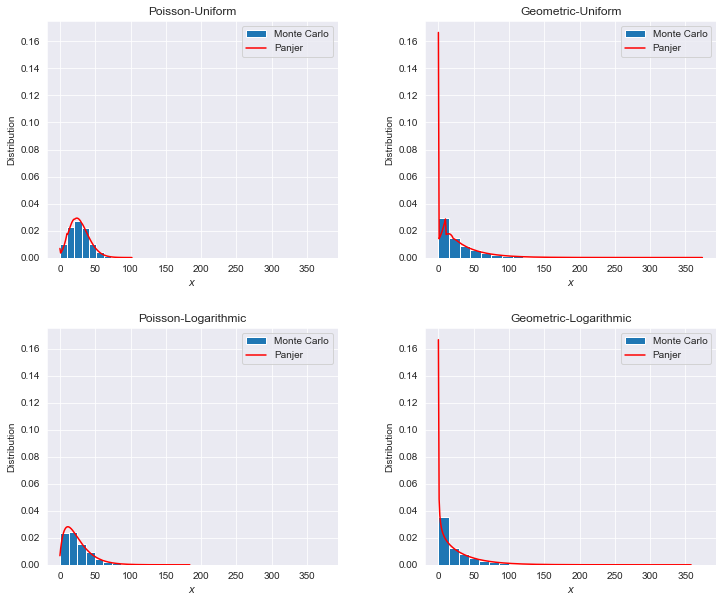

In [427]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

alpha_const = 0.5
bins_dict = {"Poisson-Uniform RVS":10, "Geometric-Uniform RVS":25, "Poisson-Logarithmic RVS":15, "Geometric-Logarithmic RVS":25}
#names_dict = {"Poisson-Uniform RVS":"$\mathcal{P$", "Geometric-Uniform RVS":"", "Poisson-Logarithmic RVS":"", "Geometric-Logarithmic RVS":""}


histograms = [
    ("Poisson-Uniform RVS", axes[0, 0]),
    ("Geometric-Uniform RVS", axes[0, 1]),
    ("Poisson-Logarithmic RVS", axes[1, 0]),
    ("Geometric-Logarithmic RVS", axes[1, 1]),
]

tanjers_values = {"Poisson-Uniform RVS":T_pu, "Geometric-Uniform RVS":T_gu, "Poisson-Logarithmic RVS":T_pl, "Geometric-Logarithmic RVS":T_gl}

for x_label, ax in histograms:
    ax.hist(df_long[df_long["Distribution"] == x_label]["rvs"], density=True, label='Monte Carlo', bins=bins_dict[x_label])
    ax.plot(tanjers_values[x_label], color="red", label='Panjer')
    ax.set_title(x_label[:-4])  
    ax.set_xlabel("$x$")      
    ax.set_ylabel("Distribution") 
    ax.legend()
    


x_min = min(ax.get_xlim()[0] for _, ax in histograms)
x_max = max(ax.get_xlim()[1] for _, ax in histograms)

y_min = min(ax.get_ylim()[0] for _, ax in histograms)
y_max = max(ax.get_ylim()[1] for _, ax in histograms)

for _, ax in histograms:
    ax.set_xlim([x_min, x_max])  
    ax.set_ylim([y_min, y_max])  
    
fig.savefig("Task4_distributions_hist_panjer.svg")

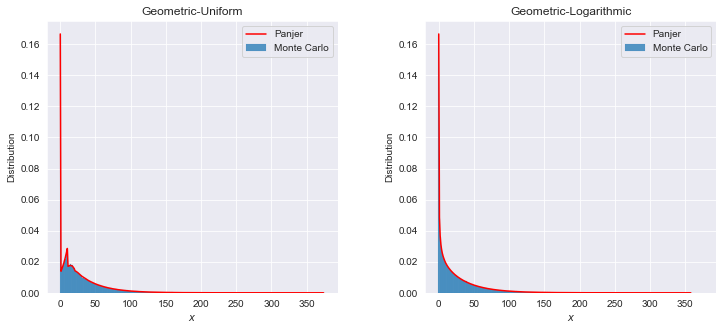

In [429]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

alpha_const = 0.5
bins_dict = {"Poisson-Uniform RVS":10, "Geometric-Uniform RVS":25, "Poisson-Logarithmic RVS":15, "Geometric-Logarithmic RVS":25}

histograms = [
    ("Geometric-Uniform RVS", axes[0]),  # Prawidłowy wybór osi
    ("Geometric-Logarithmic RVS", axes[1]),  # Prawidłowy wybór osi
]

tanjers_values = {"Poisson-Uniform RVS":T_pu, "Geometric-Uniform RVS":T_gu, "Poisson-Logarithmic RVS":T_pl, "Geometric-Logarithmic RVS":T_gl}

for x_label, ax in histograms:
    # Tworzenie histogramu dla danych Monte Carlo
    sns.histplot(df_long[df_long["Distribution"] == x_label]["rvs"], stat="density", label='Monte Carlo', ax=ax, discrete=True, color="#1f77b4", edgecolor="#1f77b4")
    # Rysowanie wartości Panjer na tym samym wykresie
    ax.plot(tanjers_values[x_label], color="red", label='Panjer')
    ax.set_title(x_label[:-4])  
    ax.set_xlabel("$x$")      
    ax.set_ylabel("Distribution") 
    ax.legend()

# Ustalanie wspólnych granic dla osi
x_min = min(ax.get_xlim()[0] for _, ax in histograms)
x_max = max(ax.get_xlim()[1] for _, ax in histograms)

y_min = min(ax.get_ylim()[0] for _, ax in histograms)
y_max = max(ax.get_ylim()[1] for _, ax in histograms)

# Ustawianie granic na tych samych osiach
for _, ax in histograms:
    ax.set_xlim([x_min, x_max])  
    ax.set_ylim([y_min, y_max])  

# Zapis wykresu
fig.savefig("Task4_distributions_hist_panjer_geom.svg")